<a href="https://colab.research.google.com/github/mezkymy/airline-cv-analysis/blob/main/airline_cust_value_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
<b>Airline Customer Value Analysis Case</b>

Deskripsi:
Dataset ini berisi data customer sebuah perusahaan penerbangan dan
beberapa fitur yang dapat menggambarkan value dari customer
tersebut.

Data:
Setiap baris mewakili customer, setiap kolom berisi atribut customer.

[Link data](https://drive.google.com/drive/folders/1v7BjYPybGlhQ9oNiPwgA-1l1uh3Vi3yW)

In [2]:
raw_data = pd.read_csv('flight.csv')
df = raw_data.copy()
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [3]:
# standardize column header to all lowercase to ease readability and processing
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62988 non-null  int64  
 1   ffp_date           62988 non-null  object 
 2   first_flight_date  62988 non-null  object 
 3   gender             62985 non-null  object 
 4   ffp_tier           62988 non-null  int64  
 5   work_city          60719 non-null  object 
 6   work_province      59740 non-null  object 
 7   work_country       62962 non-null  object 
 8   age                62568 non-null  float64
 9   load_time          62988 non-null  object 
 10  flight_count       62988 non-null  int64  
 11  bp_sum             62988 non-null  int64  
 12  sum_yr_1           62437 non-null  float64
 13  sum_yr_2           62850 non-null  float64
 14  seg_km_sum         62988 non-null  int64  
 15  last_flight_date   62988 non-null  object 
 16  last_to_end        629

<b>Deskripsi Kolom</b>


MEMBER_NO: ID Member

FFP_DATE: Frequent Flyer Program Join Date

FIRST_FLIGHT_DATE: Tanggal Penerbangan pertama

GENDER: Jenis Kelamin

FFP_TIER: Tier dari Frequent Flyer Program

WORK_CITY: Kota Asal

WORK_PROVINCE: Provinsi Asal

WORK_COUNTRY: Negara Asal

AGE: Umur Customer

LOAD_TIME: Tanggal data diambil

FLIGHT_COUNT: Jumlah penerbangan Customer

BP_SUM: Rencana Perjalanan

SUM_YR_1: Fare Revenue

SUM_YR_2: Votes Prices

SEG_KM_SUM: Total jarak(km) penerbangan yg sudah dilakukan

LAST_FLIGHT_DATE: Tanggal penerbangan terakhir

LAST_TO_END: Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir

AVG_INTERVAL: Rata-rata jarak waktu

MAX_INTERVAL: Maksimal jarak waktu

EXCHANGE_COUNT: Jumlah penukaran

avg_discount: Rata rata discount yang didapat customer

Points_Sum: Jumlah poin yang didapat customer

Point_NotFlight: point yang tidak digunakan oleh members

Berdasarkan informasi di atas, dapat disimpulkan bahwa terdapat beberapa kolom yang memiliki data kosong, sehingga saat preprocessing perlu dilakukan handling untuk baris-baris yang memiliki data kosong tersebut.

Jika setiap baris pada kolom `member_no` merupakan nilai unik, maka kolom tersebut tidak perlu digunakan dalam studi kasus ini dan dapat di drop. 

In [4]:
# check if member_no is all unique, if True then drop column
if df['member_no'].is_unique:
    df.drop('member_no', axis=1, inplace=True)

df.head()

,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


# Exploratory Data Analysis
Petunjuk:
* Pastikan setiap kolom dataset memiliki tipe data yang tepat, tidak ada data kosong, bebas dari duplikat, dan berada di range value yang tepat

* Keluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal)

* Cari tahu apakah ada kolom-kolom yang berkorelasi kuat satu sama lain

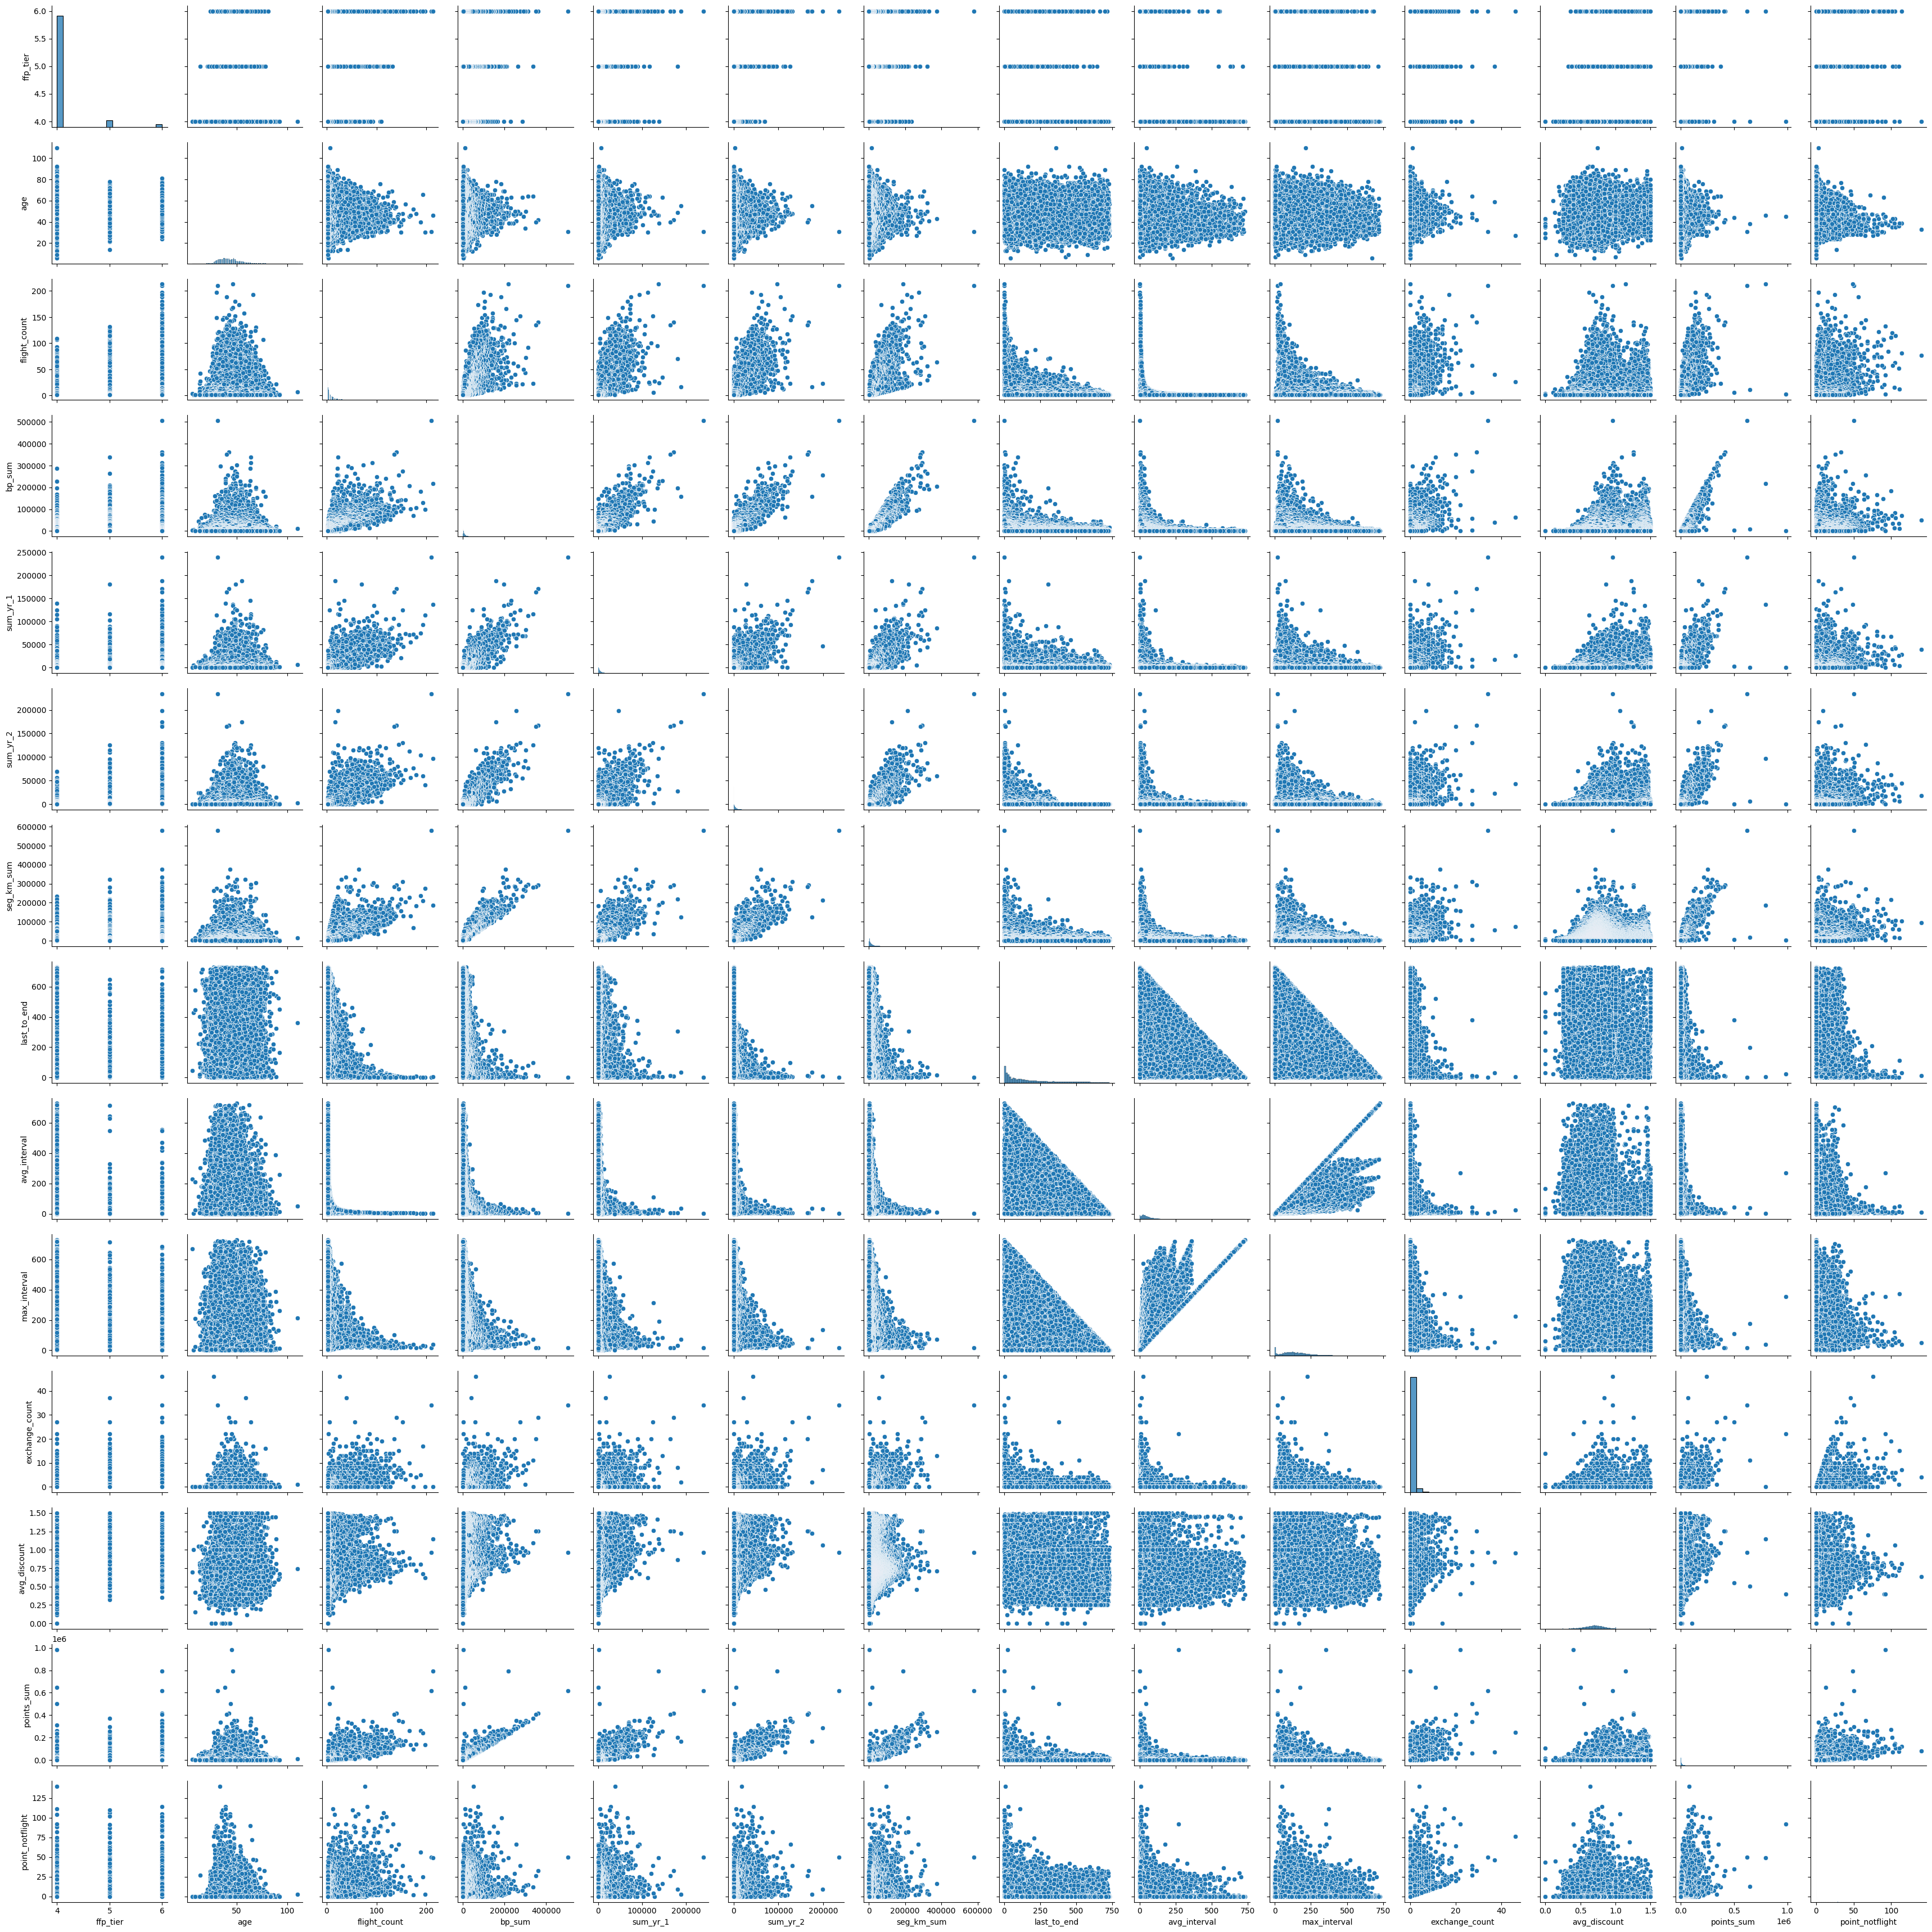

In [5]:
sns.pairplot(df)
plt.show()

# Feature Engineering
Petunjuk:
* Dari sekian banyak kolom yang ada, tentukan 3-6 fitur untuk digunakan sebagai fitur clustering. Tulis alasan teman-teman memilih fitur tersebut.

* Lakukan preprocessing dan feature engineering (apabila fitur yang teman-teman
pilih merupakan fitur baru yang dihasilkan dari fitur-fitur yang sudah ada).

# Clustering
Petunjuk:
* Temukan jumlah cluster yang optimal dengan menggunakan elbow method

* Lakukan clustering menggunakan K-means

* Evaluasi cluster yang dihasilkan dengan menggunakan visualisasi, gunakan PCA
apabila diperlukan

# Interpretasi
Petunjuk:
* Tempelkan kembali label yang dihasilkan ke dataframe asal, dan keluarkan statistik fitur dari setiap cluster

* Deskripsikan secara kontekstual customer seperti apa yang ada di masing-masing
cluster

* Berdasarkan cluster tersebut, berikan 1-2 rn